Задача **автострахования**.
Исходя из имеющихся данных нужно определить получит ли клиент страховку на свой автомобиль или нет. 

Подключим необходимые библиотеки:


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

Чтение данных:


In [5]:
data = pd.read_csv("D:\Car_Insurance_Claim.csv")

Посмотрим на содержимое нашего набора данных:


In [6]:
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [7]:
data.tail()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0
9999,442696,26-39,female,majority,0-9y,none,working class,0.435225,1.0,before 2015,1.0,1.0,10238,13000.0,sedan,0,0,0,0.0


In [8]:
print(f'Длина нашего набора данных: {len(data)}')
print(f'Размер датафрейма: {data.shape}')
print(f'Количество объектов(клиентов): {data.shape[0]}')
print(f'Количество признаков: {data.shape[1]}')

Длина нашего набора данных: 10000
Размер датафрейма: (10000, 19)
Количество объектов(клиентов): 10000
Количество признаков: 19


Получим некоторые сведения о наших данных ( заголовки, количество значений, тип данных столбцов ):

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [10]:
print(f'Отобразим список наших колонок: {data.columns.tolist()}')

Отобразим список наших колонок: ['ID', 'AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME']


Также стоит пояснить значение наших колонок ( признаков, на основании которых делаем предсказания ): 

**ID** - идентификатор водителя [число]

**AGE** - возраст клиента [26-39, 40-64, 16-25, 65+]

**GENDER** - пол клиента [female, male]

**RACE** - раса [majority(большинство), minority(меньшинство)]

**DRIVING_EXPERIENCE** - стаж вождения  [0-9y, 10-19y, 20-29y, 30y+]

**EDUCATION** - образование [high school, university, none]

**INCOME** - уровень дохода [upper class(высший), middle class(средний),
poverty(низший - бедность), working class(рабочий)]

**CREDIT_SCORE** - кредитный рейтинг - система оценки кредитоспособности (кредитных рисков) лица, основанная на численных статистических методах [число]

**VEHICLE_OWNERSHIP** - владение транспортным средством [1 - владеет, 0 - не владеет]

**VEHICLE_YEAR** - год выпуска транспортного средства [before 2015, after 2015]

**MARRIED** - семейное положение [1 - женат/замужем, 0 - не женат/не замужем]

**CHILDREN** - наличие детей [1 - есть, 0 - нет ]

**POSTAL_CODE** - почтовый индекс [число]

**ANNUAL_MILEAGE** - пробег автомобиля [число]

**VEHICLE_TYPE** - тип транспортного средства [sedan, sports car]

**SPEEDING_VIOLATIONS** - штрафы за превышение скорости [число 0 - 22]

**DUIS** - вождение в нетрезвом виде [число 0 - 6]

**PAST_ACCIDENTS** - аварии [число 0 - 15 ]

**OUTCOME** - результат выдачи страховки [1 - страховка выдана, 0 - страховка не выдана]

Количество уникальных элементов в каждой колонке:

In [11]:
data.nunique()

ID                     10000
AGE                        4
GENDER                     2
RACE                       2
DRIVING_EXPERIENCE         4
EDUCATION                  3
INCOME                     4
CREDIT_SCORE            9018
VEHICLE_OWNERSHIP          2
VEHICLE_YEAR               2
MARRIED                    2
CHILDREN                   2
POSTAL_CODE                4
ANNUAL_MILEAGE            21
VEHICLE_TYPE               2
SPEEDING_VIOLATIONS       21
DUIS                       7
PAST_ACCIDENTS            15
OUTCOME                    2
dtype: int64

Произведем подсчет количества значений в каждой колонке:

In [12]:
for col in data.columns:
    print(f'Признак {col}:\n{data[col].value_counts()}\n')

Признак ID:
569520    1
702473    1
426507    1
386239    1
454670    1
         ..
931908    1
672440    1
297005    1
559584    1
442696    1
Name: ID, Length: 10000, dtype: int64

Признак AGE:
26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: AGE, dtype: int64

Признак GENDER:
female    5010
male      4990
Name: GENDER, dtype: int64

Признак RACE:
majority    9012
minority     988
Name: RACE, dtype: int64

Признак DRIVING_EXPERIENCE:
0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: DRIVING_EXPERIENCE, dtype: int64

Признак EDUCATION:
high school    4157
university     3928
none           1915
Name: EDUCATION, dtype: int64

Признак INCOME:
upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: INCOME, dtype: int64

Признак CREDIT_SCORE:
0.629027    1
0.618094    1
0.396540    1
0.578306    1
0.633275    1
           ..
0.309272    1
0.847325    1
0.432080    1
0.527041    1
0.435225    1
Name: CREDIT_SCORE, Length: 9

Для удобства дальнейшего анализа  осуществим отбор числовых колонок и категориальных колонок:

In [13]:
num_columns = [c for c in data.columns if data[c].dtype =='int64' or data[c].dtype == 'float64']
print(f'Список числовых колонок:\n{num_columns}')

Список числовых колонок:
['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME']


In [14]:
cat_columns = [c for c in data.columns if data[c].dtype == 'object']
print(f'Список нечисловых колонок:\n{cat_columns}')

Список нечисловых колонок:
['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR', 'VEHICLE_TYPE']


Произведем замену типа object на специальный тип, который предназаначен для хранения категорильных значений:

In [15]:
for x in cat_columns:
    data[x] = data[x].astype('category')

Посмотрим на данные после внесённых нами поправок:

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   10000 non-null  int64   
 1   AGE                  10000 non-null  category
 2   GENDER               10000 non-null  category
 3   RACE                 10000 non-null  category
 4   DRIVING_EXPERIENCE   10000 non-null  category
 5   EDUCATION            10000 non-null  category
 6   INCOME               10000 non-null  category
 7   CREDIT_SCORE         9018 non-null   float64 
 8   VEHICLE_OWNERSHIP    10000 non-null  float64 
 9   VEHICLE_YEAR         10000 non-null  category
 10  MARRIED              10000 non-null  float64 
 11  CHILDREN             10000 non-null  float64 
 12  POSTAL_CODE          10000 non-null  int64   
 13  ANNUAL_MILEAGE       9043 non-null   float64 
 14  VEHICLE_TYPE         10000 non-null  category
 15  SPEEDING_VIOLATIONS 

Теперь визуализируем данные и вычислим основные характеристики. 

Для каждого количественного признака найдем средние значения, стандартное отклонение, минимальное и макимальное значения, медиану и значения квартилей.


In [17]:
data[num_columns].describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


Для каждого категориального признака посчитаем кол - во уникальных значений, наиболее распространенное знечение и частоту самого распространенного значения.

In [18]:
data[cat_columns].describe(include=['category'])


,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,4,2,2,4,3,4,2,2
top,26-39,female,majority,0-9y,high school,upper class,before 2015,sedan
freq,3063,5010,9012,3530,4157,4336,6967,9523


Перед обработкой данных посмотрим на конкретные признаки и визуализируем данные по ним. 

Построим несколько гистограмм, показывающих количество клиентов, которым одобрили страховку и тем, кто не смог её получить по некоторыми признакам.

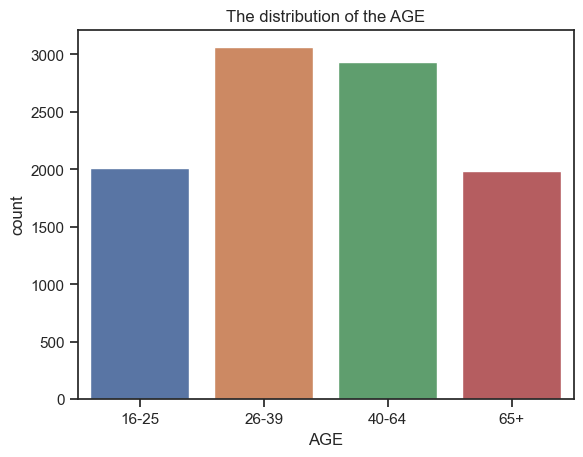

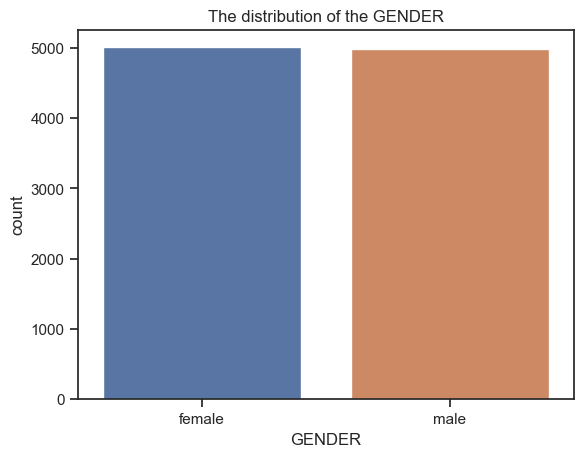

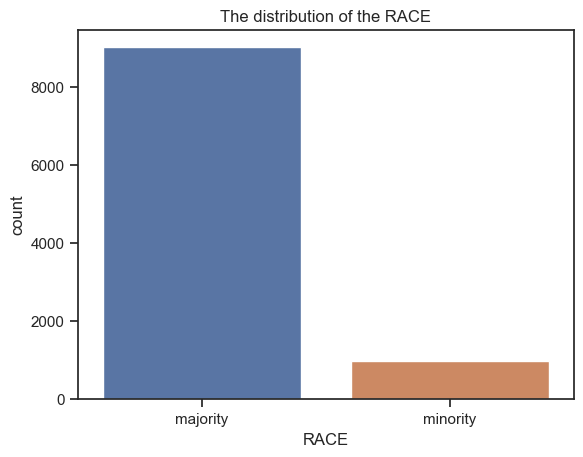

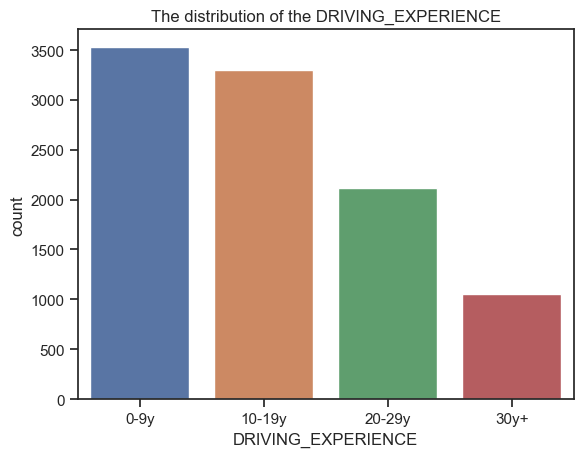

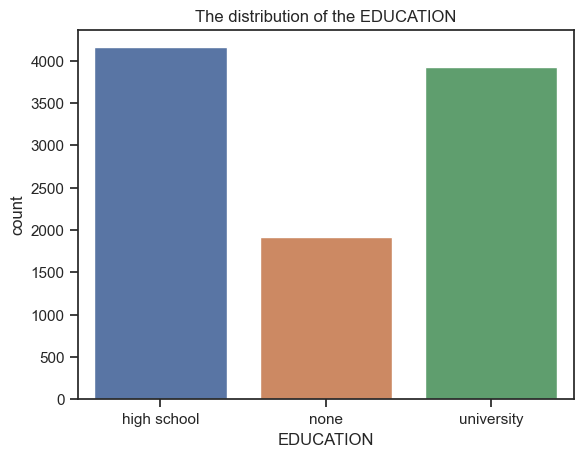

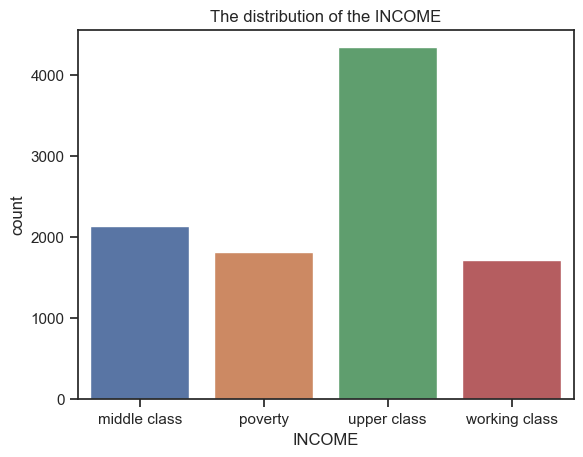

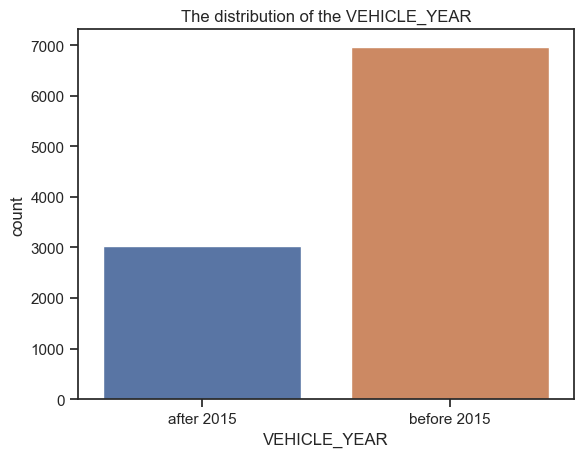

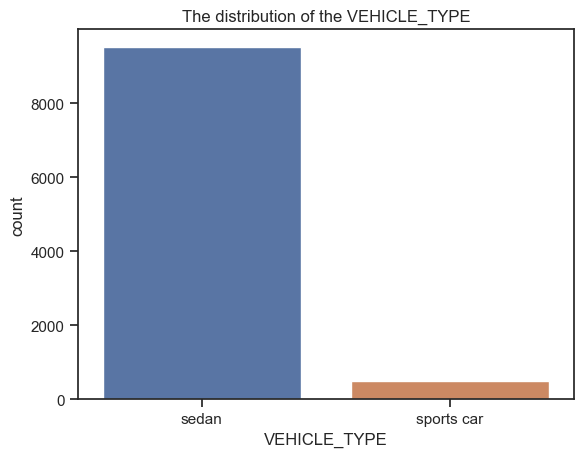

In [19]:
sns.set_theme(style = 'ticks')
for i in cat_columns: 
    sns.countplot(data = data, x = i)
    plt.title(f'The distribution of the {i}')
    plt.show()

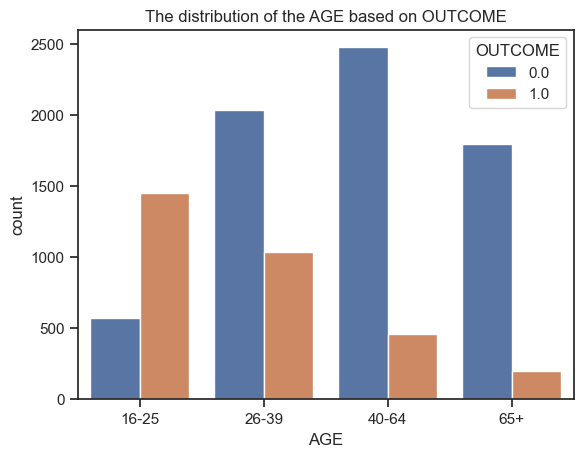

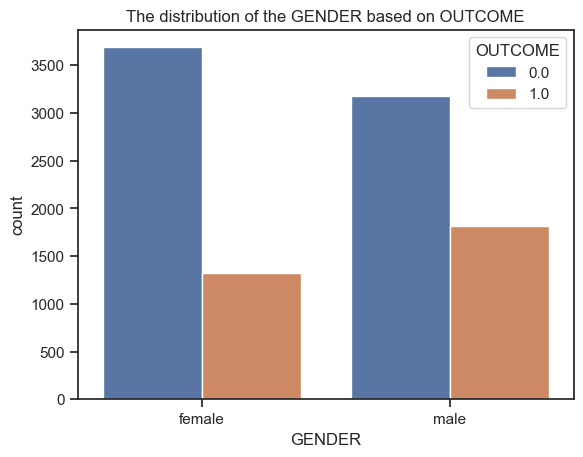

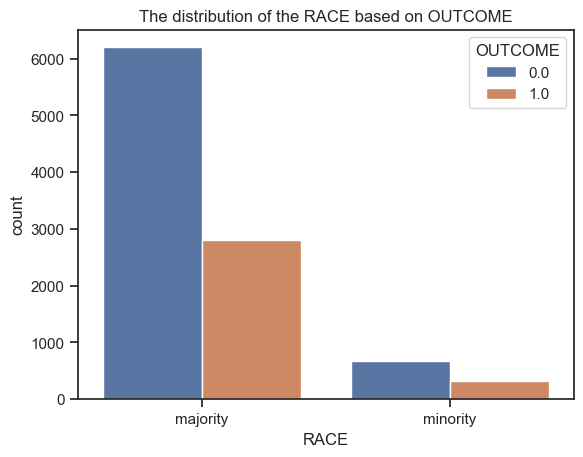

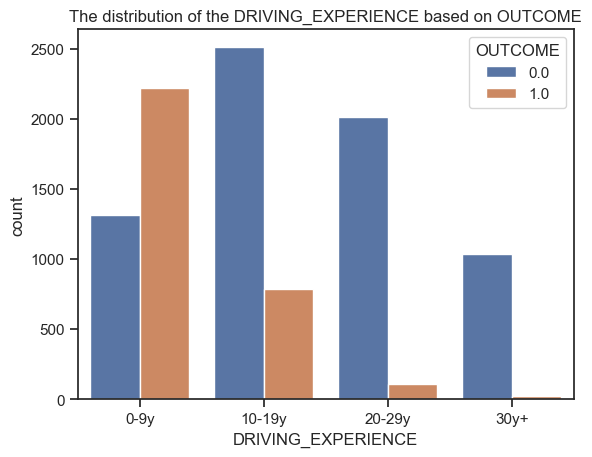

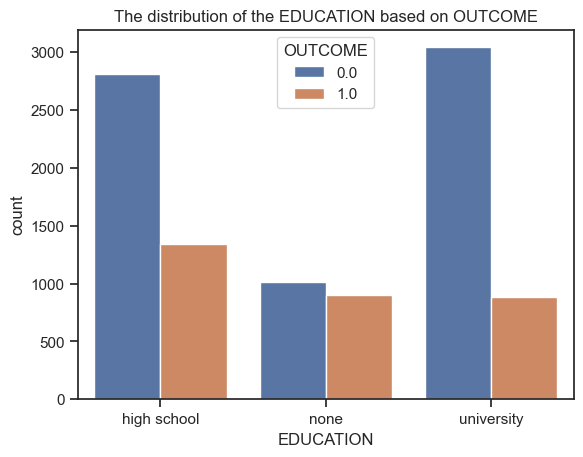

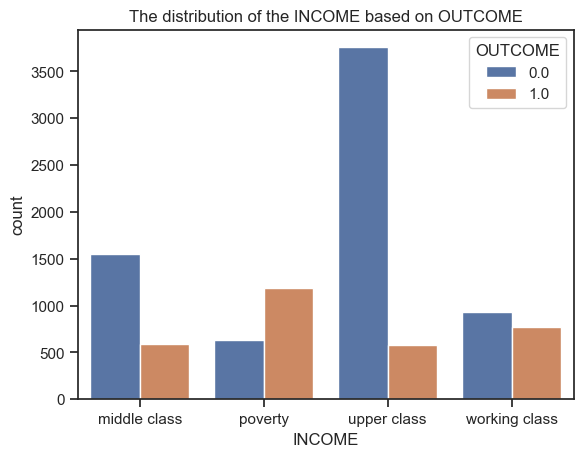

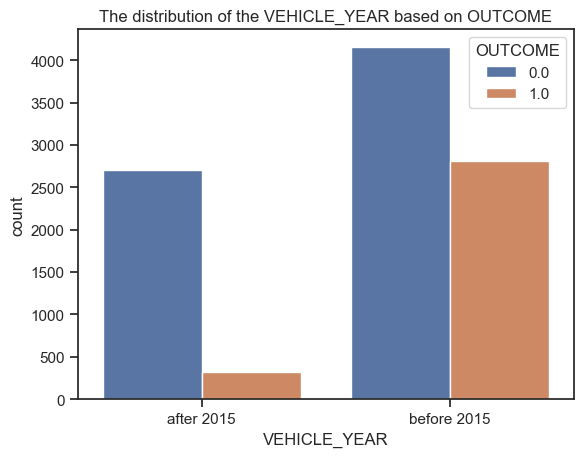

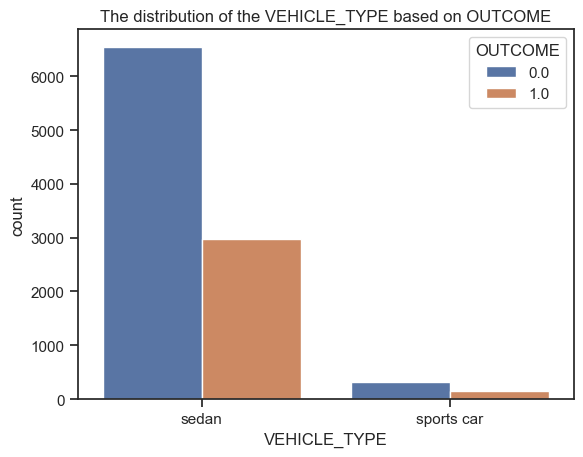

In [20]:
sns.set_theme(style = 'ticks')
for i in cat_columns: 
    sns.countplot(data = data, x = i, hue = 'OUTCOME')
    plt.title(f'The distribution of the {i} based on OUTCOME')
    plt.show()

Небольшие заметки из гистограмм приведенных выше:


**Возраст** :  Наибольший процент клиентов, которым одобрили страховку - это люди в возрасте от 16 до 25 лет.

**Пол** :  В страховке приблизительно одинаково нуждались как мужчины так и женщины. Можно заметить, что ненамного, но чаще мужчинам одобряли страховку.

**Стаж вождения** :  Наибольшее кол-во клиентов, обратившихся за страховской имели стаж вождения 0 - 9 лет и 10 - 19 лет. Чаще всего страховку одобряли людям, которые имели стаж вождения от 0 до 9 лет.

**Образование** :  Большинство клиентов - люди со средним и высшим образованием . Из этих двух категорий чаще страховку одобряли людям со средним образованием.

**Уровень дохода** :  Большинство клиентов, нуждающиеся в страховке, имели высший уровень дохода. Однако зачастую одобряли страховку людям с низшим уровнем дохода.

**Год выпуска транспортного средства** :  Транспортные средства имеющие год выпуска ( после 2015 ) почти в два раза по количеству превышали транспортные средства года выпуска ( до 2015 ). Чаще всего страховку одобряли клиентам, имеющих транспорт года выпуска после 2015.

**Тип транспортного средства** :  Чаще всего у клиентов встречался транспорт типа sedan ( и страховку соответственно чаще всего получали клиенты с данным типом  транспортного средства ) 



In [21]:
columns_num_for_gist = ['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'DUIS']

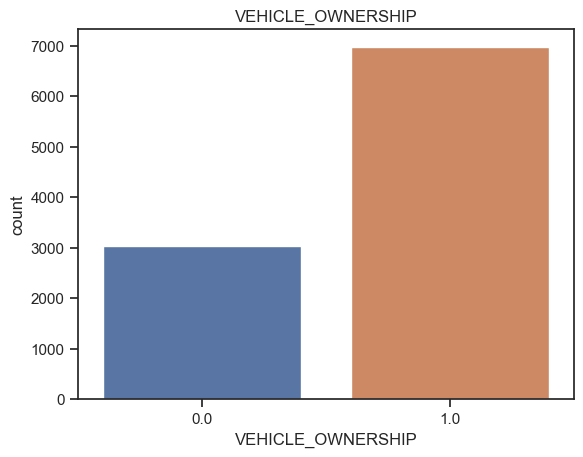

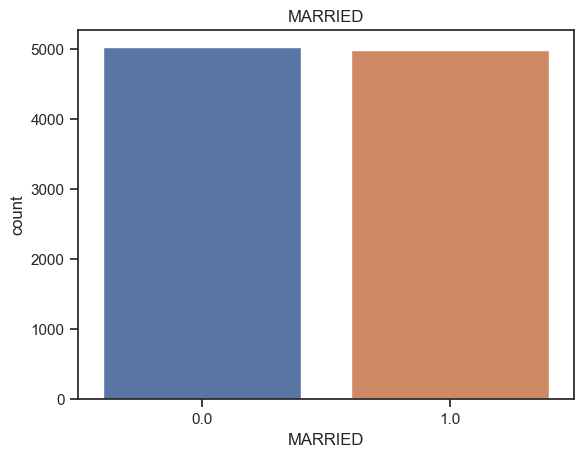

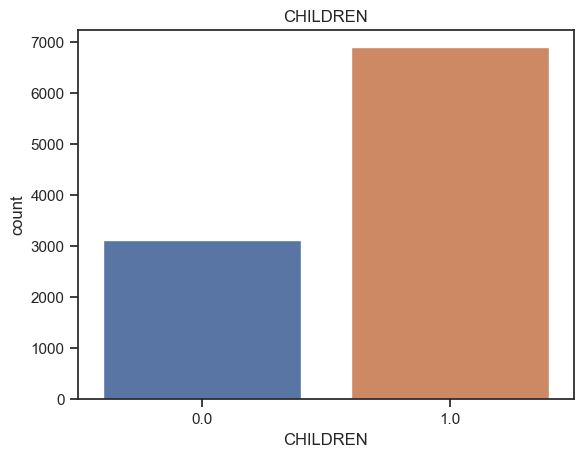

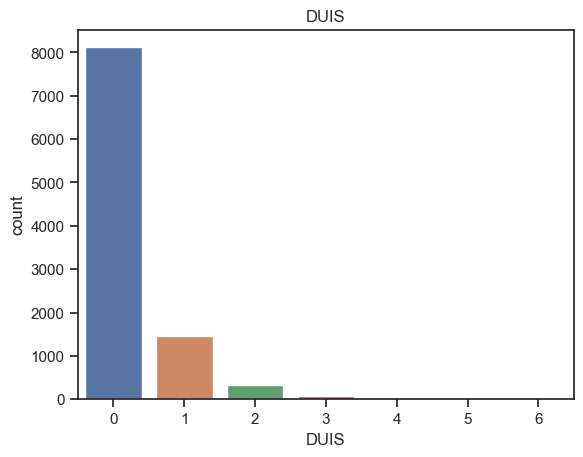

In [22]:
sns.set_theme(style = 'ticks')
for i in columns_num_for_gist: 
    sns.countplot(data = data, x = i)
    plt.title(f'{i}')
    plt.show()

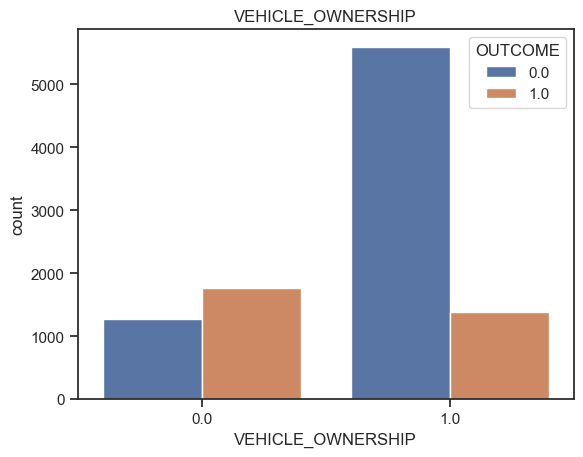

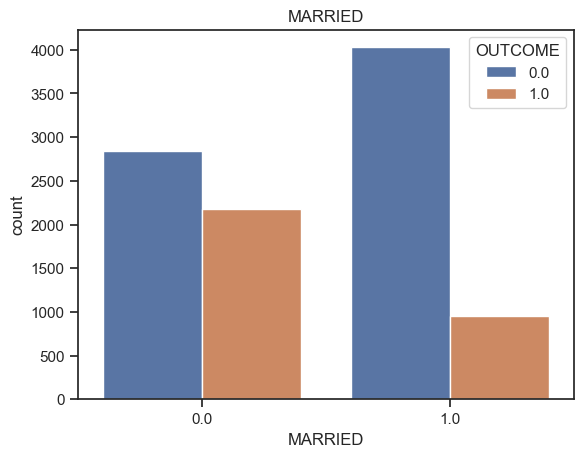

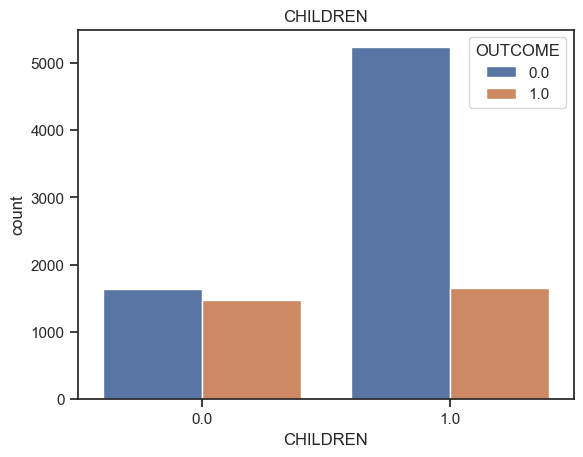

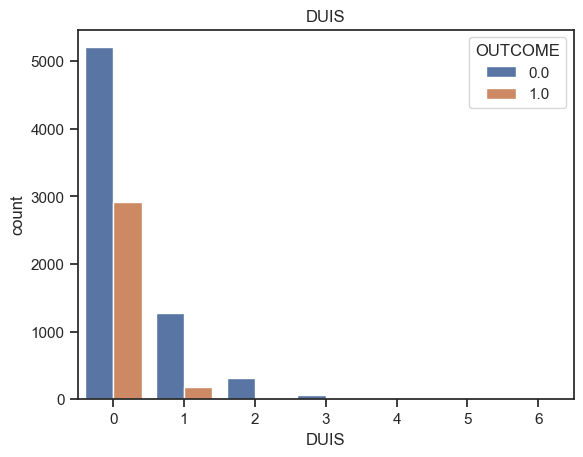

In [23]:
sns.set_theme(style = 'ticks')
for i in columns_num_for_gist: 
    sns.countplot(data = data, x = i, hue = 'OUTCOME')
    plt.title(f'{i}')
    plt.show()

Небольшие заметки из гистограмм приведенных выше:

**Владение транспортным средством** : Кол - во клиентов, имеющих транспортное средство более чем в 2 раза превышает кол - во клиентов, не владеющих транспортным средством. Однако зачастую страховку одобряли людям, которые не владели транспортом.

**Семейное положение** : Клиентов состоящих в браке приблизительно такое же кол-во как и тех, кто в браке не состоит. Стоит заметить, что чаще всего страховку получали люди, не состоящие в браке.

**Наличие детей** :  Большинство клиентов имели детей.

**Вождение в нетрезвом виде** : Более 80% клиентов не имели штрафов за вождение в нетрезвом виде, чаще всего им и одобряли страховку.


In [ ]:
fig=plt.figure(figsize=(20,15),dpi=100)
sns.pairplot(data=data,hue='OUTCOME',height=2,palette='OrRd')
plt.show()

Займемся обработкой пропущенных значений.

Посмотрим количество пропущенных значений в нашем наборе данных:

In [25]:
data.isnull().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

Пропущенные значения присутствуют в столбце CREDIT_SCORE и ANNUAL_MILEAGE. Заполним их медианой и посмотрим на кол-во пропущенных значений в данных после наших действий.

In [26]:
data['CREDIT_SCORE'].fillna(data['CREDIT_SCORE'].median(), inplace = True)


In [27]:
data['ANNUAL_MILEAGE'].fillna(data['ANNUAL_MILEAGE'].median(), inplace = True)

In [28]:
data.isnull().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

Пропущенные значения отсутствуют.

Избавимся от дубликатов в данных. 

In [29]:
key = ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']
data = data.drop_duplicates(subset=key)

print(data.shape)


(9981, 19)


Приступим к обработке категориальных признаков.

Находим категориальные признаки и используем LabelEncoder(обычная нумерация значений) для перевода в численные значения.

In [30]:

data_final = data.copy()
encoder = LabelEncoder()

for x in cat_columns:
    data_final[x] = encoder.fit_transform(data_final[x])

Все категориальные признаки стали числовыми, мы можем построить корреляционную матрицу.


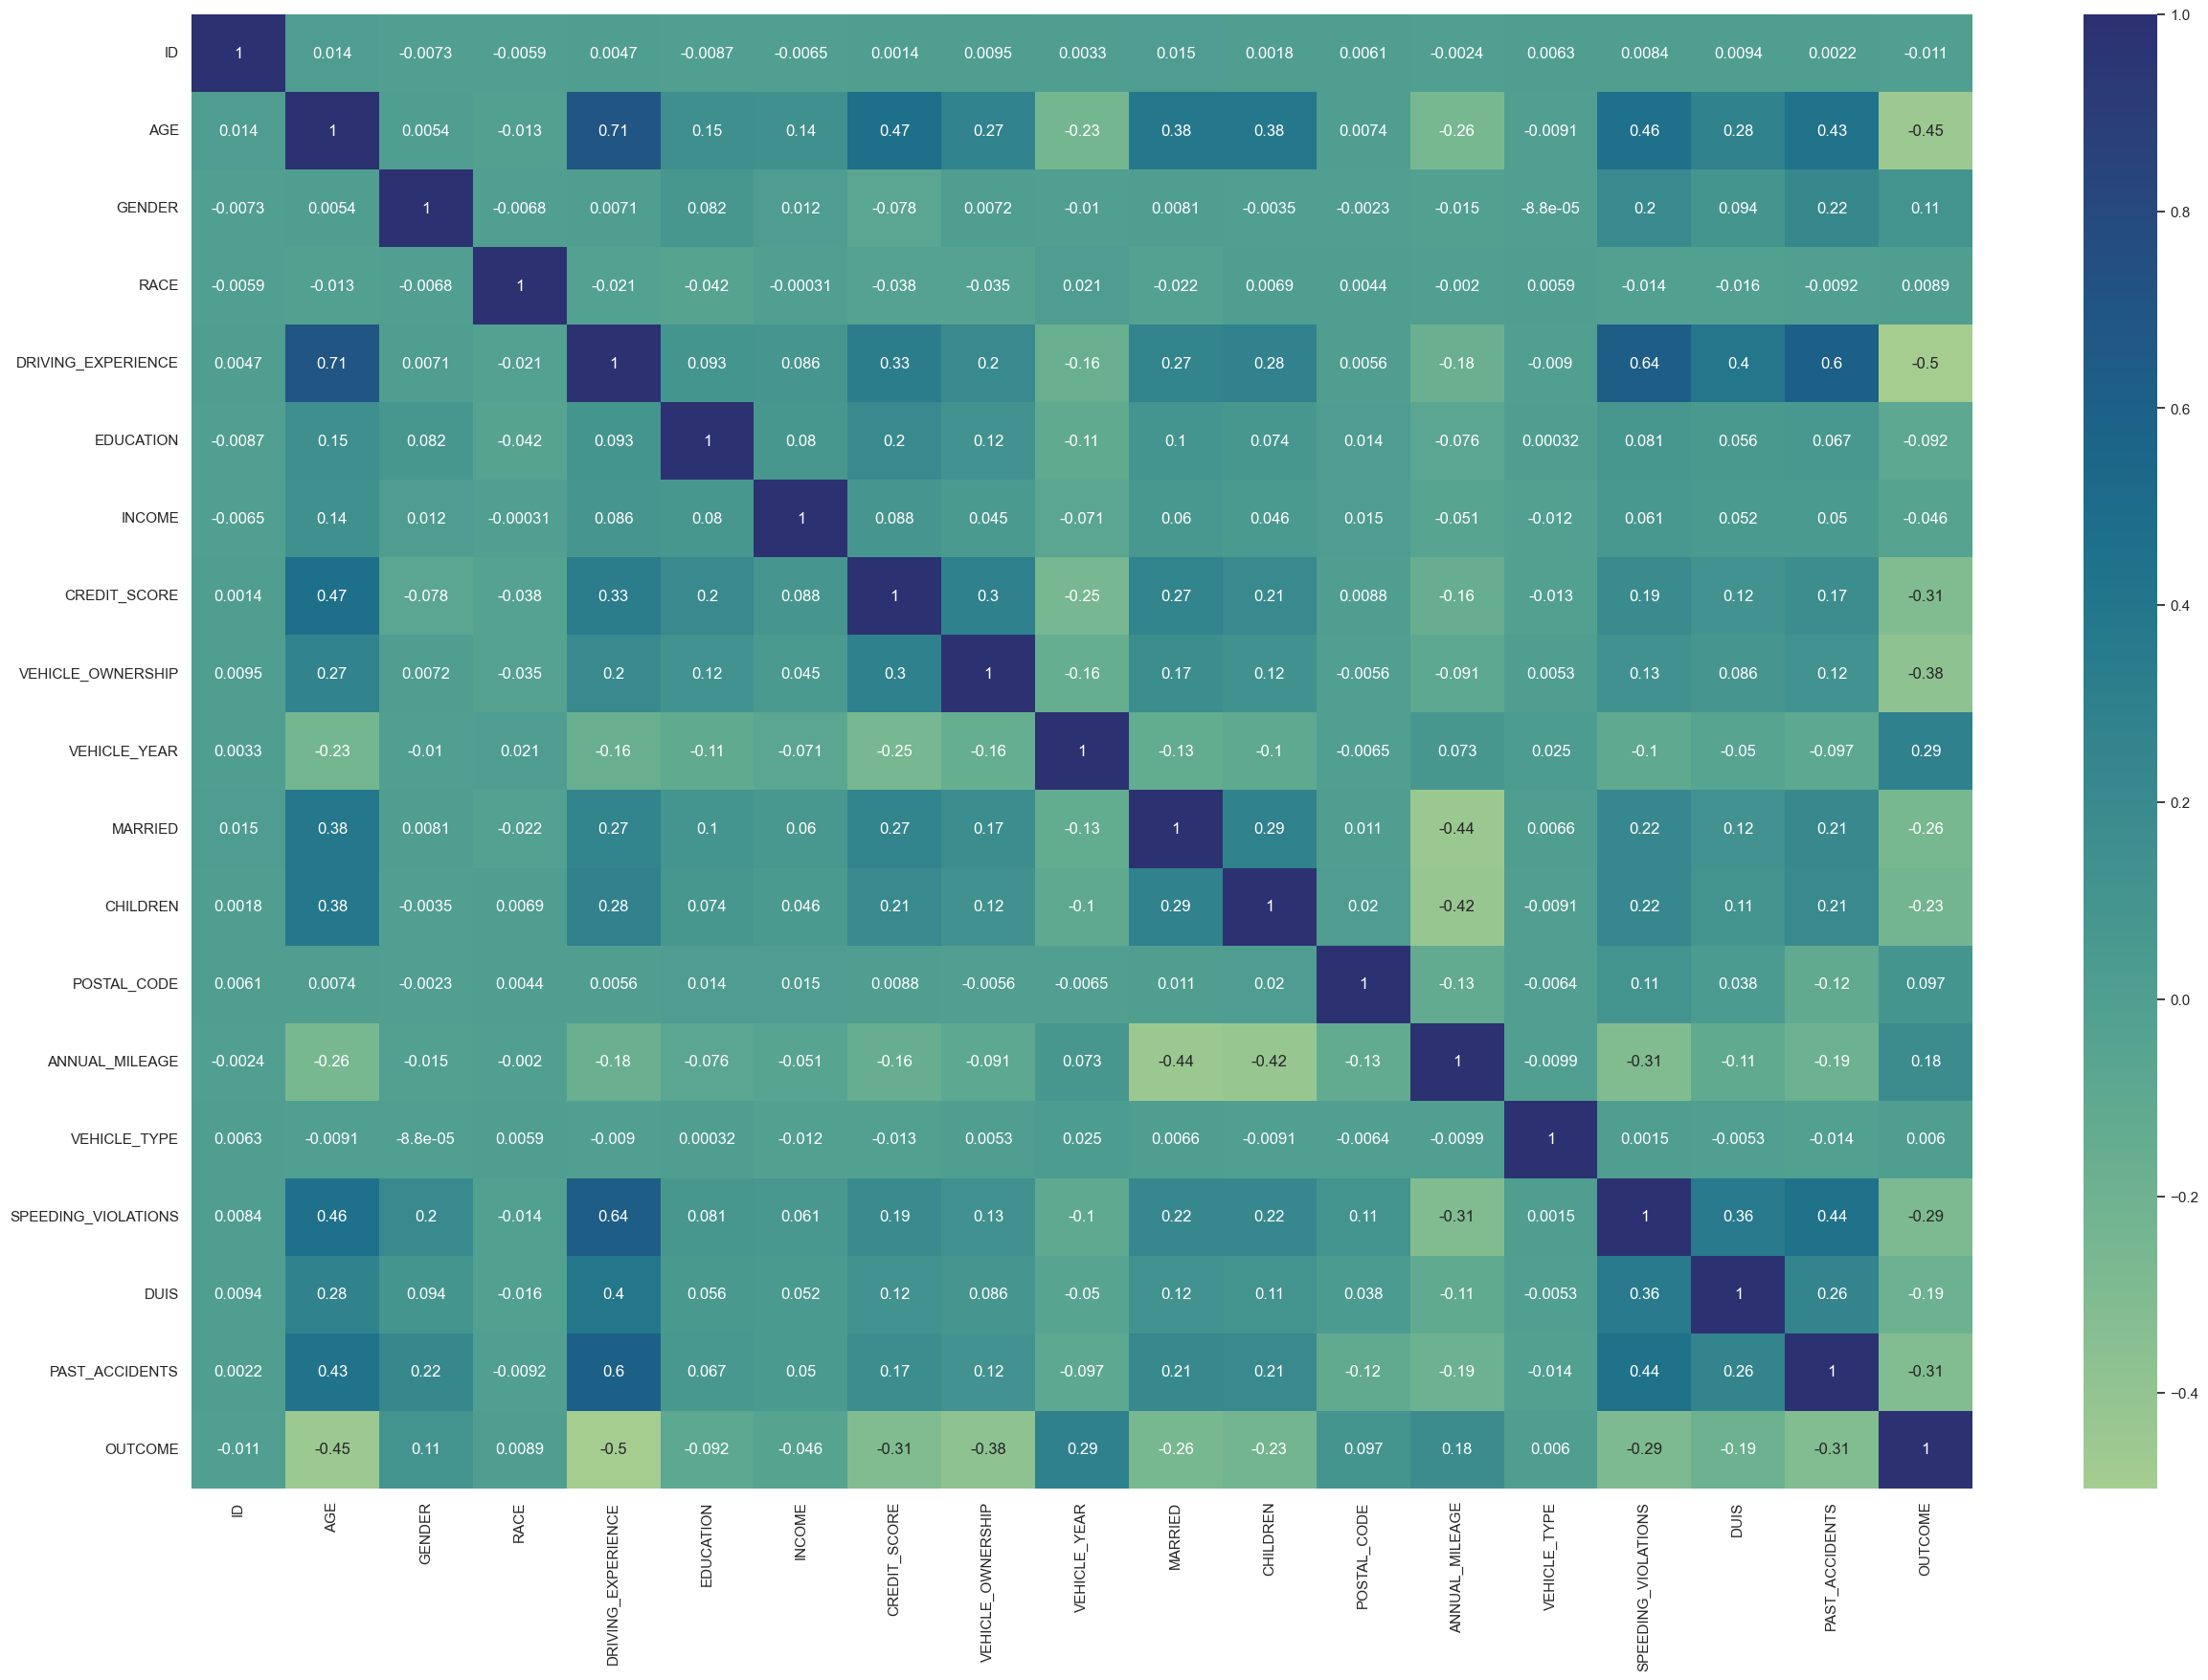

In [31]:
mask = np.zeros_like(data_final.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30,20))
    sns.heatmap(data_final.corr(), annot = True, cmap = 'crest')

Исходя из визуализации корреляционной матрицы можем сказать, что :
1) Наиболее сильная корреляция 0.71 наблюдается между DRIVING_EXPERIENCE (стажем вождения) и AGE (возрастом), что вполне логично.
2) Между SPEEDING_VIOLATIONS (штрафами за превышение скорости) и DRIVING_EXPERIENCE (стажем вождения) корреляция составляет 0.64
3) Также менее сильная корреляция наблюдается между PAST_ACCIDENTS (авариями) и DRIVING_EXPERIENCE (стажем вождения). Она составляет 0.6

Обработка выбросов.

Вновь посмотрим на  среднее значение, стандартное отклонение, минимальное и макимальное значения, медиану и значение квартилей для некоторых количественных признаков. 

In [32]:
data['PAST_ACCIDENTS'].describe()

count    9981.00000
mean        1.05811
std         1.65339
min         0.00000
25%         0.00000
50%         0.00000
75%         2.00000
max        15.00000
Name: PAST_ACCIDENTS, dtype: float64

In [33]:
data['SPEEDING_VIOLATIONS'].describe()

count    9981.000000
mean        1.485623
std         2.243208
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        22.000000
Name: SPEEDING_VIOLATIONS, dtype: float64

Построим для этих признаков соответствующие графики: boxplot и displot

Boxplot - это стандартизированный способ отображения набора данных на основе сводки из пяти чисел: минимума, максимума, медианы выборки и первого и третьего квартилей.

Displot -  гистограмма.


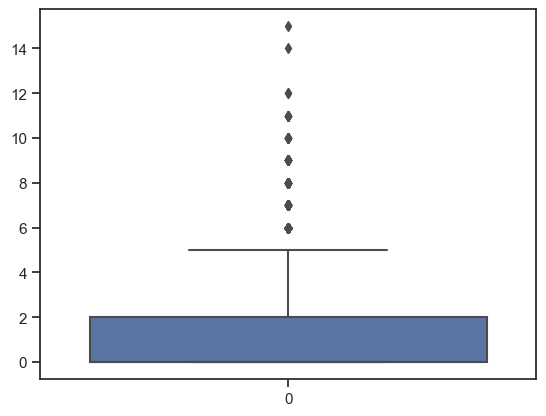

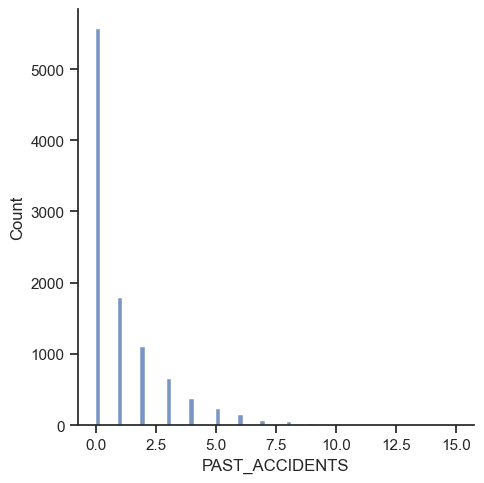

In [34]:
sns.boxplot(data_final['PAST_ACCIDENTS'])
sns.displot(data_final['PAST_ACCIDENTS'].dropna())

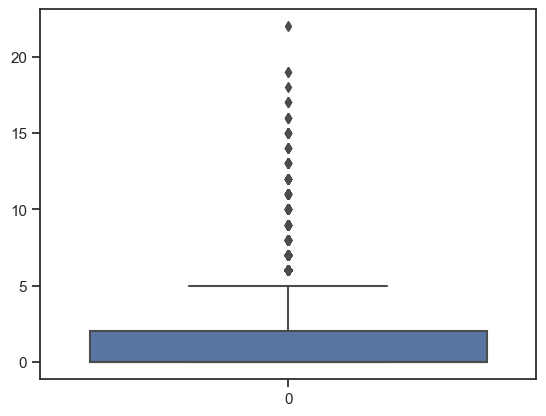

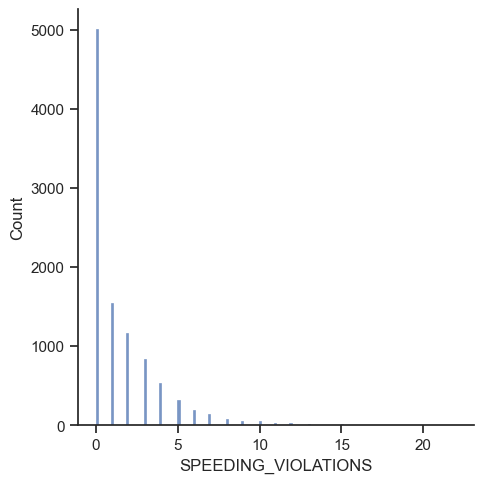

In [35]:
sns.boxplot(data_final['SPEEDING_VIOLATIONS'])
sns.displot(data_final['SPEEDING_VIOLATIONS'].dropna())

In [36]:
IQR_S = data_final['SPEEDING_VIOLATIONS'].quantile(0.75) - data_final['SPEEDING_VIOLATIONS'].quantile(0.25)
lower_bound1 = data_final['SPEEDING_VIOLATIONS'].quantile(0.25)-3*IQR_S
upper_bound1 = data_final['SPEEDING_VIOLATIONS'].quantile(0.75)+3*IQR_S

data_final = data_final[data_final['SPEEDING_VIOLATIONS'] <= upper_bound1 ]
data_final = data_final[data_final['SPEEDING_VIOLATIONS'] >= lower_bound1 ]

IQR_P = data_final['PAST_ACCIDENTS'].quantile(0.75) - data_final['PAST_ACCIDENTS'].quantile(0.25)
lower_bound2 = data_final['PAST_ACCIDENTS'].quantile(0.25)-3*IQR_P
upper_bound2 = data_final['PAST_ACCIDENTS'].quantile(0.75)+3*IQR_P

data_final = data_final[data_final['PAST_ACCIDENTS'] <= upper_bound2 ]
data_final = data_final[data_final['PAST_ACCIDENTS'] >= lower_bound2 ]



Нормализация данных:

С помощью линейного преобразования, приведем все значения к отрезку [0, 1]: 


In [37]:
data_normal = (data_final - data_final.min(axis=0)) / (data_final.max(axis=0) - data_final.min(axis=0))
data_normal.describe()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,9759.000000,9759.000000,9759.000000,9759.000000,9759.000000,9759.000000,9759.000000,9759.000000,9759.000000,9759.000000,9759.000000,9759.000000,9759.000000,9759.000000,9759.000000,9759.000000,9759.000000,9759.000000,9759.000000
mean,0.500161,0.487857,0.490419,0.099703,0.344673,0.485193,0.519076,0.509066,0.694641,0.698945,0.491956,0.684496,0.115696,0.489302,0.047751,0.161607,0.045066,0.124219,0.318475
std,0.289982,0.338533,0.499934,0.299619,0.322335,0.448702,0.338112,0.144706,0.460583,0.458740,0.499961,0.464740,0.232430,0.132720,0.213249,0.224098,0.105932,0.191944,0.465909
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.248851,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.413931,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.501321,0.333333,0.000000,0.000000,0.333333,0.500000,0.666667,0.519774,1.000000,1.000000,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.753236,0.666667,1.000000,0.000000,0.666667,1.000000,0.666667,0.609800,1.000000,1.000000,1.000000,1.000000,0.275179,0.550000,0.000000,0.250000,0.000000,0.250000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Разбиение данных на обучающую и тестовую выборки:

(Также удалим столбец 'ID' так как он не несет нам никакой полезной информации ) 

In [38]:
from sklearn.model_selection import train_test_split

X = data_normal.drop(['OUTCOME','ID'], axis = 1)
y = data_normal['OUTCOME']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, shuffle=True)

Посмотрим на обучающую выборку:

In [39]:
X_train.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
7477,0.666667,1.0,0.0,0.666667,0.0,0.333333,0.298937,0.0,1.0,1.0,1.0,1.0,0.30,0.0,0.125,0.2,0.125
9070,0.333333,0.0,0.0,0.000000,0.0,0.000000,0.631747,1.0,0.0,0.0,1.0,0.0,0.60,0.0,0.000,0.0,0.000
8244,1.000000,1.0,0.0,0.333333,1.0,0.666667,0.519774,1.0,0.0,0.0,1.0,1.0,0.45,0.0,0.125,0.2,0.250
5565,0.333333,0.0,0.0,0.333333,0.0,0.000000,0.548763,1.0,0.0,0.0,0.0,0.0,0.55,0.0,0.000,0.0,0.000
3709,0.666667,0.0,0.0,0.000000,1.0,0.666667,0.519774,1.0,0.0,0.0,1.0,0.0,0.55,0.0,0.000,0.0,0.000


In [40]:
y_train

7477    0.0
9070    0.0
8244    0.0
5565    0.0
3709    0.0
       ... 
2955    0.0
8007    1.0
921     0.0
5311    0.0
243     0.0
Name: OUTCOME, Length: 7319, dtype: float64

Воспользуемся GridSearchCV для перебора параметров. 

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

def cv_params(model, param_grid):
    scoring = 'neg_mean_absolute_error' 
    opt_params = GridSearchCV(
      estimator = model,
      param_grid = param_grid,
      scoring = scoring, 
      cv = 5,
      n_jobs = -1 ) 
    opt_params.fit(X_train,y_train) 
    params = opt_params.best_params_ 
    best_score = opt_params.best_score_ 

    print(f'Best score:{round(-best_score,2)}')
    print(f'Best parameters:{params}\n')

    return params
  

**KNeighborsClassifier**

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn_param_grid = {
    'n_neighbors': np.arange(1,50), 
    'metric': ['manhattan', 'euclidean'], 
    'weights': ['uniform', 'distance'] 
    
}
knn_clean = KNeighborsClassifier()
knn_params = cv_params(knn_clean, knn_param_grid)


Best score:0.17
Best parameters:{'metric': 'manhattan', 'n_neighbors': 49, 'weights': 'uniform'}



Обучаем наш классификатор с наилучшими параметрами, найденными по сетке.

In [79]:
import time
knn = KNeighborsClassifier(**knn_params)
knn.fit(X_train,y_train)
start_time = time.time()
pred_knn = knn.predict(X_test)
pred_knn_train = knn.predict(X_train)
start_time = time.time()
error_train = np.mean(y_train != pred_knn_train)
error_test  = np.mean(y_test  != pred_knn)
end_time = time.time()
runtime = end_time - start_time

print(f'Ошибка на трейне = {error_train}')
print(f'Ошибка на тесте  = {error_test}')
print(f'Время работы = {runtime}')

Ошибка на трейне = 0.16750922257138953
Ошибка на тесте  = 0.175
Время работы = 0.0010030269622802734


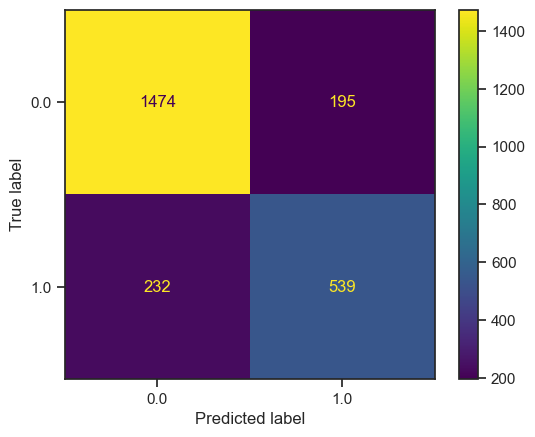

In [80]:
ConfusionMatrixDisplay.from_predictions(y_test,pred_knn)

In [81]:
print(f'Точность на тестовой выборке {accuracy_score(y_test,pred_knn)}')
print(f'Точность на тренировочной выборке {accuracy_score(y_train,pred_knn_train)}')


Точность на тестовой выборке 0.825
Точность на тренировочной выборке 0.8324907774286104


Посмотрим также на график, который будет демонстрировать нам значение точности предсказаний в зависимости от количества ближайших соседей:

In [83]:

accuracy_list_train = []
accuracy_list_test = []
for i in range(1, 51):
    KNN = KNeighborsClassifier(n_neighbors=i,metric='manhattan',weights='uniform')
    KNN.fit(X_train, y_train)
    
    accuracy_train = round(KNN.score(X_train, y_train)*100, 4)
    accuracy_list_train.append(accuracy_train)
    
    accuracy_test = round(KNN.score(X_test, y_test)*100, 4)
    accuracy_list_test.append(accuracy_test)

Text(0, 0.5, 'ACCURACY, %')

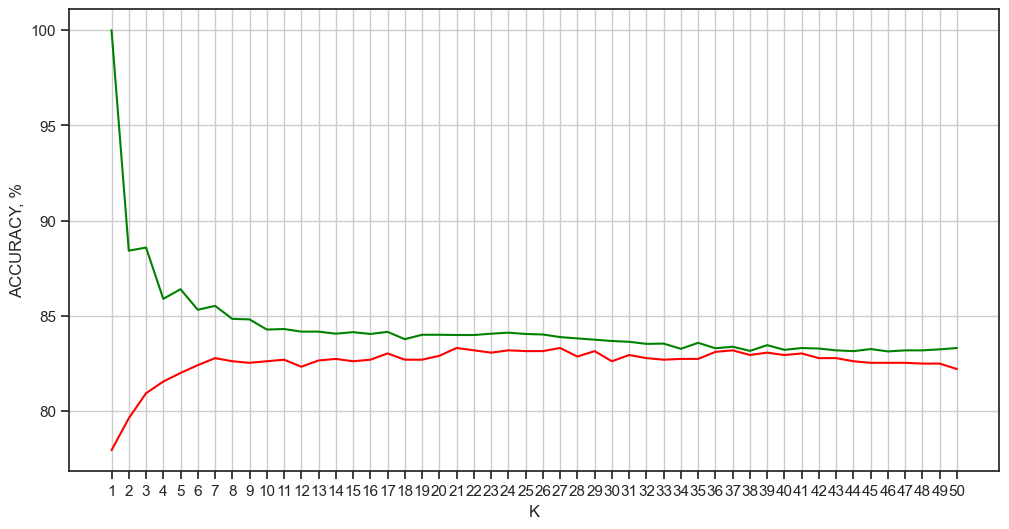

In [84]:
k = np.arange(1, 51)
plt.figure(figsize=(12, 6))
plt.plot(k, accuracy_list_train, 'green')
plt.plot(k, accuracy_list_test, 'red')
plt.xlabel('K')
plt.xticks(np.arange(min(k), max(k)+1, 1))
plt.grid(which='major')
plt.ylabel('ACCURACY, %')

Найдем значение k, при котором достигается максимальная точность на тестовой выборке:

In [85]:
for i in range(0,50):
    if accuracy_list_test[i] == np.max(accuracy_list_test):
        print(f'Количество соседей: {i+1} , дастигаемая точность: {accuracy_list_test[i]}')

Количество соседей: 21 , дастигаемая точность: 83.3197
Количество соседей: 27 , дастигаемая точность: 83.3197


Обучим наш классификатор с соответствующим значением кол-ва соседей, максимизирующем точность на тестовой выборке.

In [89]:
knn = KNeighborsClassifier(n_neighbors=27,metric='manhattan',weights='uniform')
knn.fit(X_train,y_train)
start_time = time.time()
pred_knn = knn.predict(X_test)
pred_knn_train = knn.predict(X_train)
start_time = time.time()
error_train = np.mean(y_train != pred_knn_train)
error_test  = np.mean(y_test  != pred_knn)
end_time = time.time()
runtime = end_time - start_time

print(f'Ошибка на трейне = {error_train}')
print(f'Ошибка на тесте  = {error_test}')
print(f'Время работы = {runtime}')

Ошибка на трейне = 0.16108758027052877
Ошибка на тесте  = 0.1668032786885246
Время работы = 0.0019948482513427734


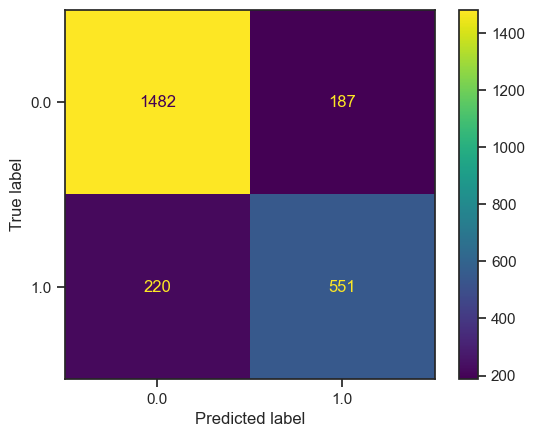

In [90]:
ConfusionMatrixDisplay.from_predictions(y_test,pred_knn)

In [154]:
print(f'Точность на тестовой выборке {round(accuracy_score(y_test,pred_knn)*100,4)}')
print(f'Точность на тренировочной выборке {round(accuracy_score(y_train,pred_knn_train)*100,4)}')
print(f'Значение AUC_ROC на тестовой выборке: {round(roc_auc_score(y_test,pred_knn)*100,4)} ')
print(f'Значение precision на тестовой выборке: {round(precision_score(y_test,pred_knn)*100,4)}')
print(f'Значение recall на тестовой выборке: {round(recall_score(y_test,pred_knn)*100,4)} ')
print(f'Значение f1 на тестовой выборке: {round(f1_score(y_test,pred_knn)*100,4)} ')

Точность на тестовой выборке 83.3197
Точность на тренировочной выборке 83.8912
Значение AUC_ROC на тестовой выборке: 80.1307 
Значение precision на тестовой выборке: 74.6612
Значение recall на тестовой выборке: 71.4656 
Значение f1 на тестовой выборке: 73.0285 


**RandomForest**

In [96]:
from sklearn.ensemble import RandomForestClassifier
rf_param_grid = {
    'max_depth': [3,5,7,10,15], 
    'n_estimators':[100,200,300,400] 
}
rf_clean = RandomForestClassifier()
rf_params = cv_params(rf_clean,rf_param_grid)

Best score:0.16
Best parameters:{'max_depth': 10, 'n_estimators': 200}



In [97]:
rf = RandomForestClassifier(**rf_params)
rf.fit(X_train,y_train)
start_time = time.time()
pred_rf = rf.predict(X_test)
pred_rf_train = rf.predict(X_train)
start_time = time.time()
error_train = np.mean(y_train != pred_rf_train)
error_test  = np.mean(y_test  != pred_rf)
end_time = time.time()
runtime = end_time - start_time

print(f'Ошибка на трейне = {error_train}')
print(f'Ошибка на тесте  = {error_test}')
print(f'Время работы = {runtime}')

Ошибка на трейне = 0.09495832764038803
Ошибка на тесте  = 0.15122950819672132
Время работы = 0.0009970664978027344


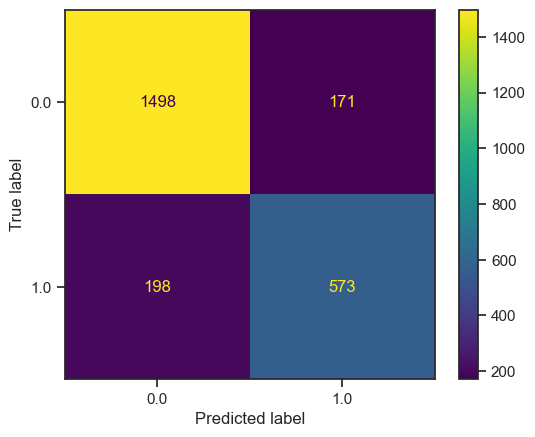

In [98]:
ConfusionMatrixDisplay.from_predictions(y_test,pred_rf)

In [99]:
print(f'Точность на тестовой выборке {round(accuracy_score(y_test,pred_rf)*100,4)}')
print(f'Точность на тренировочной выборке {round(accuracy_score(y_train,pred_rf_train)*100,4)}')

Точность на тестовой выборке 84.877
Точность на тренировочной выборке 90.5042


Посмотрим также на график, который будет демонстрировать нам значение точности от кол-ва деревьев в лесу:

In [101]:
from sklearn.ensemble import RandomForestClassifier
accuracy_list_train = []
accuracy_list_test = []
for i in range(50, 500,50):
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(X_train, y_train)
    
    accuracy_train = round(rf.score(X_train, y_train)*100, 4)
    accuracy_list_train.append(accuracy_train)
    
    accuracy_test = round(rf.score(X_test, y_test)*100, 4)
    accuracy_list_test.append(accuracy_test)

Text(0, 0.5, 'ACCURACY, %')

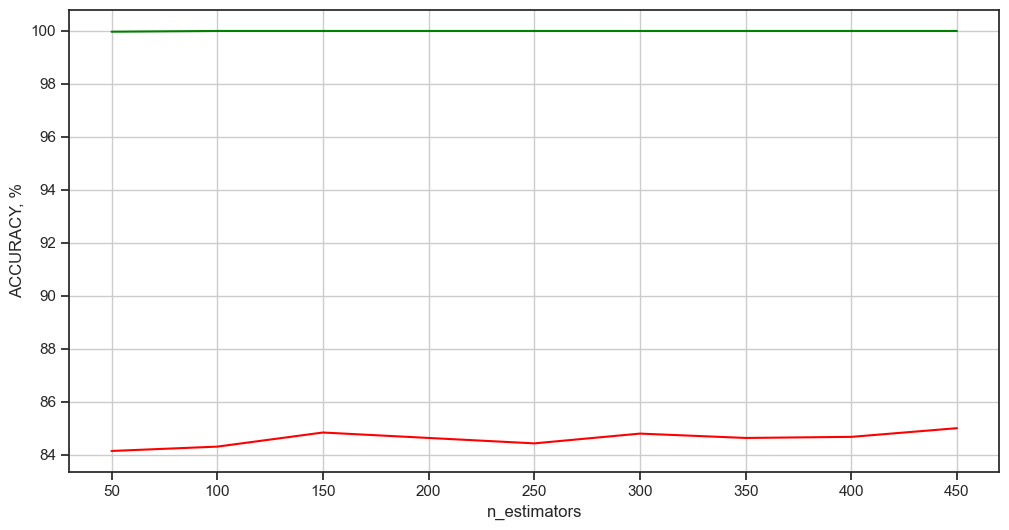

In [103]:
i = np.arange(50, 500, 50)
plt.figure(figsize=(12, 6))
plt.plot(i, accuracy_list_train, 'green')
plt.plot(i, accuracy_list_test, 'red')
plt.xlabel('n_estimators')
plt.xticks(np.arange(min(i), max(i)+1, 50))
plt.grid(which='major')
plt.ylabel('ACCURACY, %')

Посмотрим также на график, который будет демонстрировать нам значение точности от максимальной глубины дерева ( при фиксированном наилучшем кол-ве деревьев в лесу n_estimators = 450  :

In [117]:

from sklearn.ensemble import RandomForestClassifier
accuracy_list_train = []
accuracy_list_test = []
for i in range(1, 15, 1):
    rf = RandomForestClassifier(max_depth=i,  n_estimators=450)
    rf.fit(X_train, y_train)
    
    accuracy_train = round(rf.score(X_train, y_train)*100, 4)
    accuracy_list_train.append(accuracy_train)
    
    accuracy_test = round(rf.score(X_test, y_test)*100, 4)
    accuracy_list_test.append(accuracy_test)

Text(0, 0.5, 'ACCURACY, %')

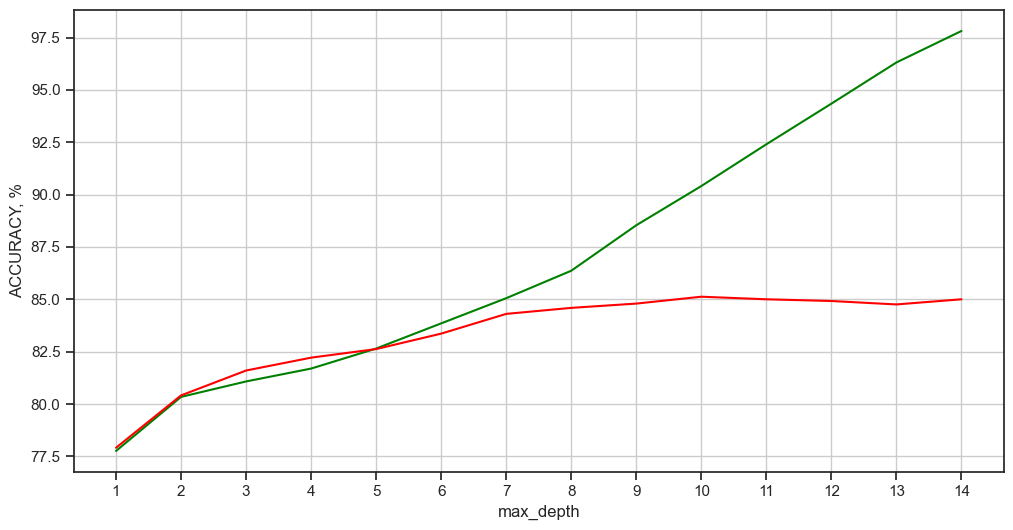

In [159]:
i = np.arange(1, 15, 1)
plt.figure(figsize=(12, 6))
plt.plot(i, accuracy_list_train, 'green')
plt.plot(i, accuracy_list_test, 'red')
plt.xlabel('max_depth')
plt.xticks(np.arange(min(i), max(i)+1, 1))
plt.grid(which='major')
plt.ylabel('ACCURACY, %')

Обучим наш классификатор с соответствующими значениями кол-ва деревьев в лесу и глубиной дерева:

In [128]:
rf = RandomForestClassifier(max_depth=10,  n_estimators=450)
rf.fit(X_train,y_train)
start_time = time.time()
pred_rf = rf.predict(X_test)
pred_rf_train = rf.predict(X_train)
start_time = time.time()
error_train = np.mean(y_train != pred_rf_train)
error_test  = np.mean(y_test  != pred_rf)
end_time = time.time()
runtime = end_time - start_time


print(f'Ошибка на трейне = {error_train}')
print(f'Ошибка на тесте  = {error_test}')
print(f'Время работы = {runtime}')

Ошибка на трейне = 0.09550485038939746
Ошибка на тесте  = 0.1483606557377049
Время работы = 0.0009980201721191406


In [129]:
print(f'Точность на тестовой выборке {round(accuracy_score(y_test,pred_rf)*100,4)}')
print(f'Точность на тренировочной выборке {round(accuracy_score(y_train,pred_rf_train)*100,4)}')

Точность на тестовой выборке 85.1639
Точность на тренировочной выборке 90.4495


In [152]:
print(f'Значение AUC_ROC на тестовой выборке: {round(roc_auc_score(y_test,pred_rf)*100,4)} ')
print(f'Значение precision на тестовой выборке: {round(precision_score(y_test,pred_rf)*100,4)}')
print(f'Значение recall на тестовой выборке: {round(recall_score(y_test,pred_rf)*100,4)} ')
print(f'Значение f1 на тестовой выборке: {round(f1_score(y_test,pred_rf)*100,4)} ')

Значение AUC_ROC на тестовой выборке: 82.3511 
Значение precision на тестовой выборке: 77.5236
Значение recall на тестовой выборке: 74.7082 
Значение f1 на тестовой выборке: 76.0898 


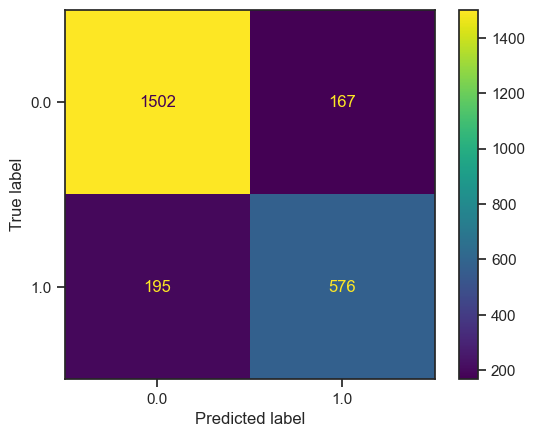

In [130]:
ConfusionMatrixDisplay.from_predictions(y_test,pred_rf)

Таким образом, наилучший результат для Случайного леса :

    Кол - во деревьев в лесу 450
    Глубина дерева 10
    Точность на тестовой выборке 85.1639
    Точность на тренировочной выборке 90.4495

**Lightgbm**

In [155]:
import lightgbm
lgb_param_grid = {
    'max_depth':[4,7,10,15,20,25],
    'num_leaves':[25,35,45],
    'n_estimators':[35,50,100,250,400]
}
lgb_clean =lightgbm.LGBMClassifier()
lgb_params = cv_params(lgb_clean,lgb_param_grid)

Best score:0.15
Best parameters:{'max_depth': 4, 'n_estimators': 100, 'num_leaves': 25}



In [156]:

lgb = lightgbm.LGBMClassifier(**lgb_params)
lgb.fit(X_train,y_train)
start_time = time.time()
pred_lgb = lgb.predict(X_test)
pred_lgb_train = lgb.predict(X_train)
start_time = time.time()
error_train = np.mean(y_train != pred_lgb_train)
error_test  = np.mean(y_test  != pred_lgb)
end_time = time.time()
runtime = end_time - start_time

print(f'Ошибка на трейне = {error_train}')
print(f'Ошибка на тесте  = {error_test}')
print(f'Время работы = {runtime}')

Ошибка на трейне = 0.13266839732203853
Ошибка на тесте  = 0.14549180327868852
Время работы = 0.11034059524536133


In [157]:
print(f'Точность на тестовой выборке {round(accuracy_score(y_test,pred_lgb)*100,4)}')
print(f'Точность на тренировочной выборке {round(accuracy_score(y_train,pred_lgb_train)*100,4)}')
print(f'Значение AUC_ROC на тестовой выборке: {round(roc_auc_score(y_test,pred_lgb)*100,4)} ')
print(f'Значение precision на тестовой выборке: {round(precision_score(y_test,pred_lgb)*100,4)}')
print(f'Значение recall на тестовой выборке: {round(recall_score(y_test,pred_lgb)*100,4)} ')
print(f'Значение f1 на тестовой выборке: {round(f1_score(y_test,pred_lgb)*100,4)} ')

Точность на тестовой выборке 85.4508
Точность на тренировочной выборке 86.7332
Значение AUC_ROC на тестовой выборке: 82.8748 
Значение precision на тестовой выборке: 77.5862
Значение recall на тестовой выборке: 75.8755 
Значение f1 на тестовой выборке: 76.7213 


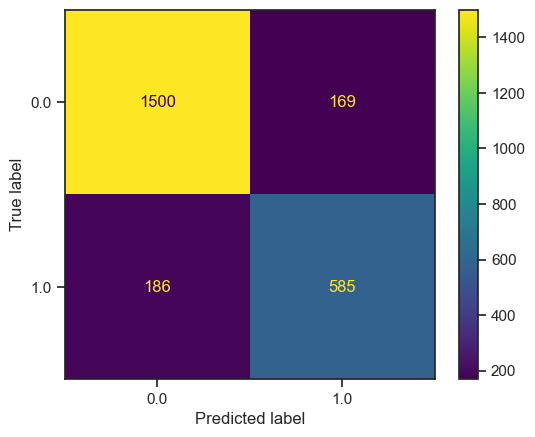

In [158]:
ConfusionMatrixDisplay.from_predictions(y_test,pred_lgb)

**LogisticRegression**

In [134]:
from sklearn.linear_model import LogisticRegression
logreg_param_grid = {
    'solver': ['lbfgs'],
    'random_state':[0,1,2],
    'max_iter':[200,300,400],

}
logreg_clean = LogisticRegression()
logreg_params = cv_params(logreg_clean, logreg_param_grid)

Best score:0.16
Best parameters:{'max_iter': 200, 'random_state': 0, 'solver': 'lbfgs'}



In [135]:
logr = LogisticRegression(**logreg_params)
logr.fit(X_train,y_train)
start_time = time.time()
pred_logr = logr.predict(X_test)
pred_logr_train = logr.predict(X_train)
start_time = time.time()
error_train = np.mean(y_train != pred_logr_train)
error_test  = np.mean(y_test  != pred_logr)
end_time = time.time()
runtime = end_time - start_time

print(f'Ошибка на трейне = {error_train}')
print(f'Ошибка на тесте  = {error_test}')
print(f'Время работы = {runtime}')

Ошибка на трейне = 0.15972127339800518
Ошибка на тесте  = 0.15163934426229508
Время работы = 0.0009968280792236328


In [153]:
print(f'Точность на тестовой выборке {round(accuracy_score(y_test,pred_logr)*100,4)}')
print(f'Точность на тренировочной выборке {round(accuracy_score(y_train,pred_logr_train)*100,4)}')
print(f'Значение AUC_ROC на тестовой выборке: {round(roc_auc_score(y_test,pred_logr)*100,4)} ')
print(f'Значение precision на тестовой выборке: {round(precision_score(y_test,pred_logr)*100,4)}')
print(f'Значение recall на тестовой выборке: {round(recall_score(y_test,pred_logr)*100,4)} ')
print(f'Значение f1 на тестовой выборке: {round(f1_score(y_test,pred_logr)*100,4)} ')

Точность на тестовой выборке 84.8361
Точность на тренировочной выборке 84.0279
Значение AUC_ROC на тестовой выборке: 81.7625 
Значение precision на тестовой выборке: 77.4282
Значение recall на тестовой выборке: 73.4112 
Значение f1 на тестовой выборке: 75.3662 


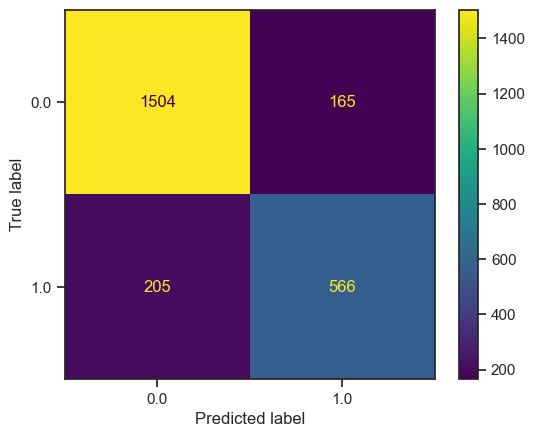

In [138]:
ConfusionMatrixDisplay.from_predictions(y_test,pred_logr)

**Выводы:**
В рассмотренной задаче автострахования я применяла такие алгоритмы как:
- LogisticRegression 
- Lightgbm
- RandomForestClassifier
- KNeighborsClassifier

Алгоритм, который показал себя лучше всего:
- Lightgbm

  Вот его результаты:
    
  Точность на тестовой выборке 85.4508
  
  Точность на тренировочной выборке 86.7332
  
  Значение AUC_ROC на тестовой выборке: 82.8748 
  
  Значение precision на тестовой выборке: 77.5862
  
  Значение recall на тестовой выборке: 75.8755 
  
  Значение f1 на тестовой выборке: 76.7213 

Алгоритм, который работал быстрее всего:

- LogisticRegression

  Время работы = 0.0009968280792236328
  
  
Благодаря граммотной обработке данных и подбору параметров удалось достигнуть хорошего качества на тестовой выборке, а именно 
85.45 %, при этом на трейне качестно ненамного больше  86.73%. 
